# Describing pendulum with differential equations (given an initial state)

![title](pendulum.png)

Imagine having a pendulum of lenght $L$.
We measure the arch $x$ (distance) it covers using the angle $\theta$ (in radiants) and $L$. In fact, we have that:
$$x = L \theta$$

The effect of the gravity acceleration (considering only the component in the direction of the pendulum acceleration) is $$-gsin(\theta)$$

Assuming the gravity acceleration to be negative means that we are assuming theta to be positive when the pendulum is oxillating on the right, and negative when the pendulum is oxillating on the left.

Hence we have that: 
$$a = \ddot{x} =  -g sin(\theta)$$

By def. we have also that:

$$a = \ddot{x} = L \ddot{\theta} = -g sin(\theta)$$

Hence we have: 
$$ \ddot{\theta} = -\frac{g}{L} sin(\theta)$$

But, this equation is the result considering only the ideal case. If we add the air resistance (function of $\dot{\theta}$ ) we can conclude having the following **Second order ODE (Ordinary Differential Equation)**: 

$$\ddot{\theta}(t) = - \mu \dot{\theta} (t) - \frac{g}{L} sin(\theta(t))$$

We can split the second order ODE into a **system of two second order ODE**: if we describe the pendulum evolution in a graph $[ \theta, \dot{\theta}]$, we can describe all the states the pendulum can assume. Each point has coordinates: 

\begin{bmatrix} 
\theta (t) \\
\dot{\theta} (t)
\end{bmatrix}


For each point of the plane, we can find with the derivative w.r.t. t, which is basically the "direction" of the next state ($t+\delta t)$ of the pendulum. In this way we can describe all the state the pendulum can have. Basically we are describing a **field**. <br> 
We obtain the system of two second order ODE deriving w.r.t. t:

$$
\frac{d}{dt}
\begin{bmatrix}
\theta (t) \\
\dot{\theta}(t)
\end{bmatrix}
= 
\begin{bmatrix}
\dot{\theta} (t) \\
\ddot{\theta} (t)
\end{bmatrix}
= 
\begin{bmatrix}
\dot{\theta} (t) \\
- \mu \dot{\theta} (t) - \frac{g}{L} sin(\theta(t))
\end{bmatrix}
$$

Solve it analyitically it's much difficult. What we simple do is solving it empirically with python, given initial state and discrete time slots. <br> 
Basically, decided a finite $\Delta t$, we compute at each (i+1)-th step: $ \theta \text{, } \dot{\theta} \text{ and } \ddot{\theta} $ as follows:

\begin{align}
&\theta_{i+1} = \theta_i + \dot{\theta}_i \cdot \Delta t \\
&\dot{\theta}_{i+1} = \dot{\theta}_i + \ddot{\theta}_i \cdot \Delta t \\
&\ddot{\theta}_{i+1} = - \mu \dot{\theta}_i - \frac{g}{L} \cdot \sin(\theta_i)
\end{align}

Hence, given initial values of pendulum angle w.r.t. the vertical line $\theta$ and pendulum velocity (in radiant per seconds), we store the results of each iteration in a pandas dataframe, and let's see how the pendulum behaves!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as colss

import seaborn as sb

In [2]:
# Physical constants
g = 9.8   # gravity acceleration
L = 2     # pendulum length (meters)
mu = 0.1  # air constraint

In [3]:

class theta_analysis:
    """
    This class solves empirically the differential equation  of a pendulum
    of lenght L (i.e = 2) and considering air friction coefficient (i.e mu = 0.1)
    
    input: 
    - initial state:
       - t:           time (seconds) to reach with "time_step" steps
       - theta_0:     initial value of theta
       - theta_dot_0  initial velocity of the pendulum
       - time_step    steps needed
    """
    
    @staticmethod
    def get_theta_double_dot(theta, theta_dot):
        "Ordinary Differential Equation for the pendulum"
        return -mu * theta_dot - (g/L) * np.sin(theta)

    @staticmethod
    def theta(t, THETA_0, THETA_DOT_0, time_step):
        """
        function which takes as input initial values and makes a dataframe
        input: 
        - t, theta_0, theta_dot_0, time_step
        Output:
        - df: dataframe containing [t, theta, theta_dot, theta_double_dot]
        """
        
        # initialize changing values and time_step (delta t)
        theta = THETA_0
        theta_dot = THETA_DOT_0
        delta_t = time_step

        # creating the lists of all the changes
        steps = np.arange(0,t, delta_t)
        theta_list = [theta]
        theta_dot_list = [theta_dot]
        theta_double_dot_list = [theta_analysis.get_theta_double_dot(theta,theta_dot)]

        # computing for each step: theta, theta_dot and adding it to the 2 lists
        for time in steps:
            # calling the function of the same class (theta_analysis) to compute theta double dot
            theta_double_dot = theta_analysis.get_theta_double_dot(theta, theta_dot)
            theta += theta_dot * delta_t
            theta_dot += theta_double_dot * delta_t

            theta_list.append(theta)
            theta_dot_list.append(theta_dot)
            theta_double_dot_list.append(theta_double_dot)

        # create a pandas dataframe 
        df = pd.DataFrame(list(zip(steps, theta_list, theta_dot_list, theta_double_dot_list)),
                          columns= ["t", "theta", "theta_dot", "theta_double_dot"])
        return df
        
        

    def __init__(self, t = 10, THETA_0 = np.pi/3, THETA_DOT_0 = 0, time_step = 0.01):
        self.t = t
        self.theta_0 = THETA_0
        self.theta_dot_0 = THETA_DOT_0
        self.time_step = time_step
        
        self.df = self.theta(self.t, self.theta_0, self.theta_dot_0, self.time_step) 
        
        
    def plot_t_vs_theta(self):
        f = plt.figure(figsize=(10,6))
        plt.scatter(self.df.t, self.df.theta)
        plt.xlabel("t")
        plt.ylabel("theta")
        plt.title("theta behaviour during time, considering %d time observations" %len(self.df))
        plt.grid(zorder = 0.9)
        plt.show()
        
        return
    
    def plot_thetadot_vs_theta(self):        
        # preparing points to plot arrows
        U = np.array(self.df.theta)
        V = np.array(self.df.theta_dot)
        X = np.array(self.df.theta_dot)
        Y = np.array(self.df.theta_double_dot)
        
        fig, ax = plt.subplots(figsize = (20,10))
        
        ax.scatter(self.df.theta[0], self.df.theta_dot[0], color = "red")
        plt.xlabel("THETA")
        plt.ylabel("THETA_DOT")
        q = ax.quiver(U, V, X, Y, linewidths=1, width=0.0009, color="black")
        plt.title("Pendulum evolution given an initial state (marked with a red dot)")
        plt.grid()
        plt.show()
        
        return

### Pendulum with:
    - theta = 60°
    - speed = 0
    - period of analysis: 10 seconds

In [4]:
# let's try it: 
# initial state of the pendulum: 60 degrees with velocity 0 

t = 10
theta_0 = np.pi/3 
theta_dot_0 = 0
time_step = 0.1

res = theta_analysis(t, theta_0, theta_dot_0, time_step)
res.df.head()

,t,theta,theta_dot,theta_double_dot
0,0.0,1.047198,0.000000,-4.243524
1,0.1,1.047198,-0.424352,-4.243524
2,0.2,1.004762,-0.844461,-4.201089
3,0.3,0.920316,-1.249594,-4.051323
4,0.4,0.795357,-1.627036,-3.774427


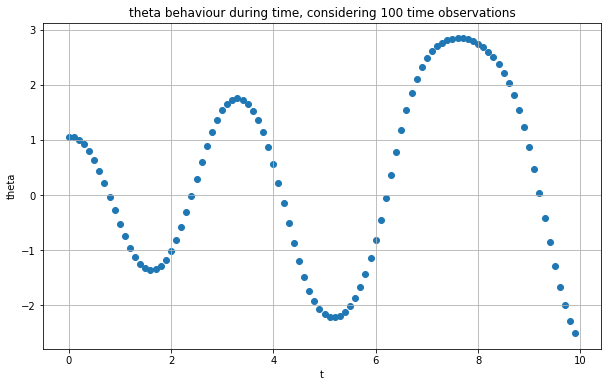

In [5]:
# theta behaviour
res.plot_t_vs_theta()

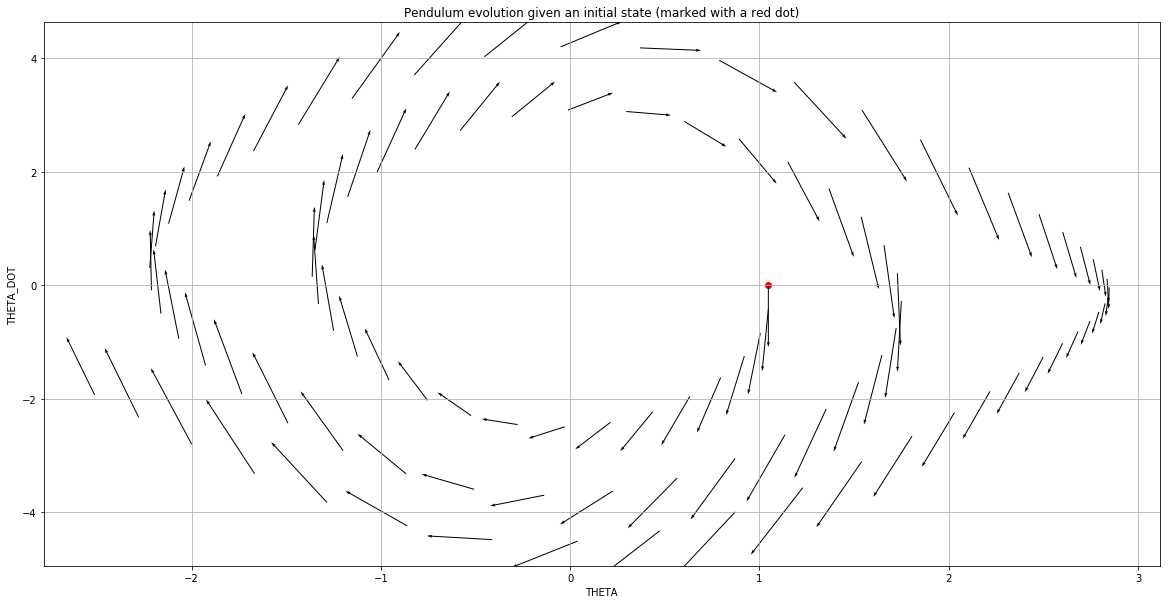

In [6]:
res.plot_thetadot_vs_theta()

In [7]:
# let's try with more time slots

t = 10
theta_0 = np.pi/3 
theta_dot_0 = 0
time_step = 0.01

res = theta_analysis(t, theta_0, theta_dot_0, time_step)

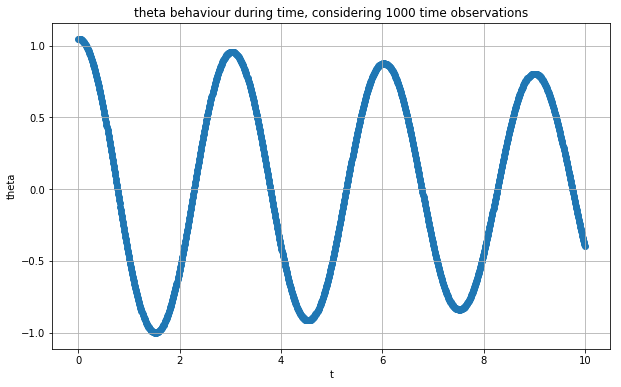

In [8]:
res.plot_t_vs_theta()

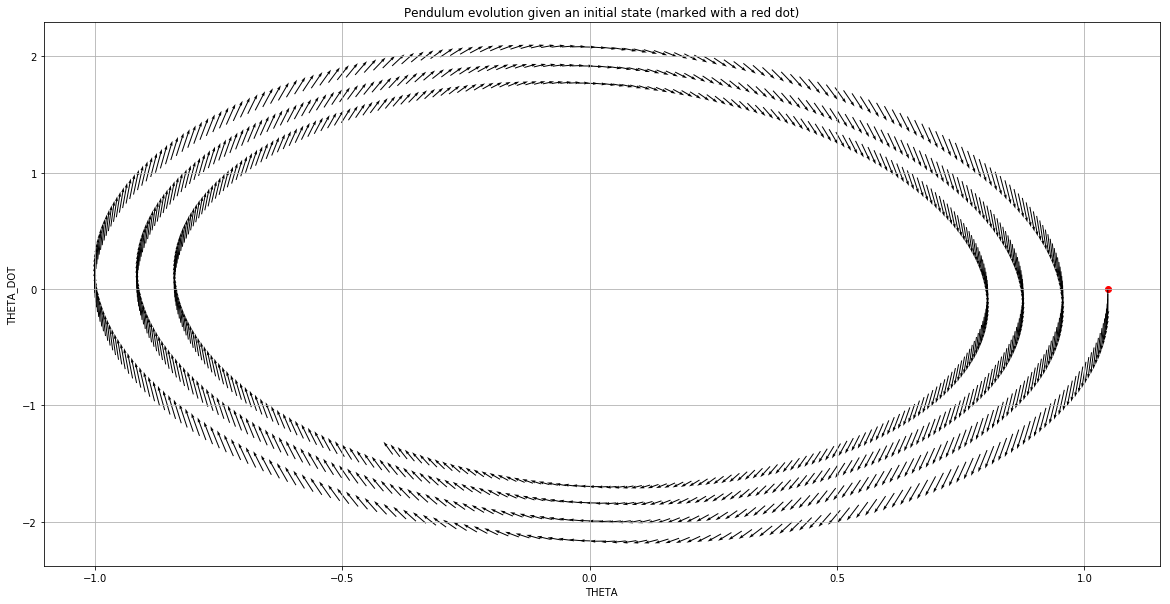

In [9]:
res.plot_thetadot_vs_theta()

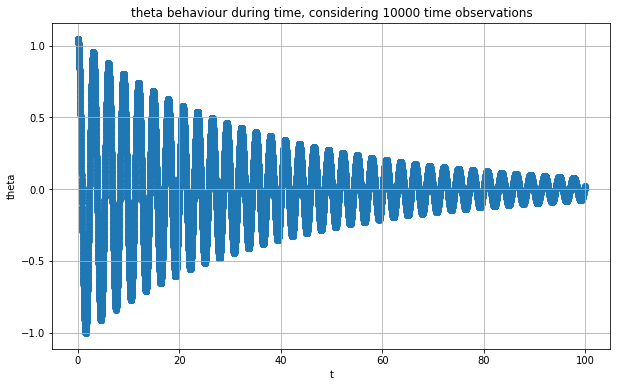

In [10]:
# now, let's try with 100s

t = 100
theta_0 = np.pi/3 
theta_dot_0 = 0
time_step = 0.01

res = theta_analysis(t, theta_0, theta_dot_0, time_step)
res.plot_t_vs_theta()

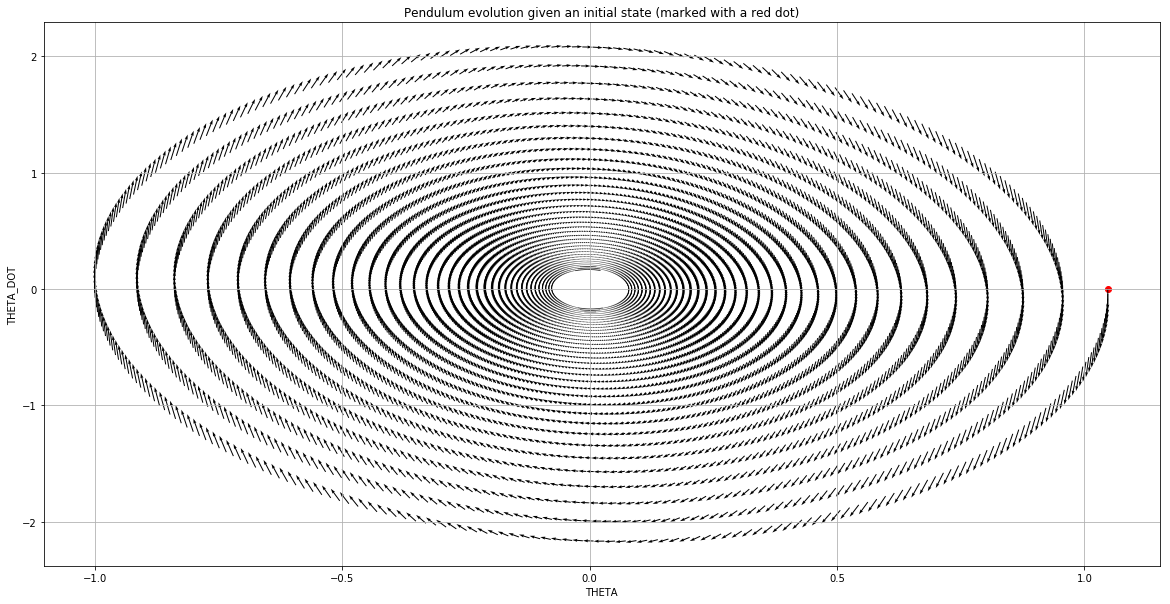

In [11]:
res.plot_thetadot_vs_theta()

### Pendulum with:
    - initial angle: theta = 80°
    - initial speed: theta_dot = 4 rad/s

In [12]:
# ok, now let's change initial values

# let's use really high initial velocity
t = 10
theta_0 = np.pi * 80 / 180 # 80 degrees
theta_dot_0 = 4            # velocity of 4
time_step = 0.05

res = theta_analysis(t, theta_0, theta_dot_0, time_step)

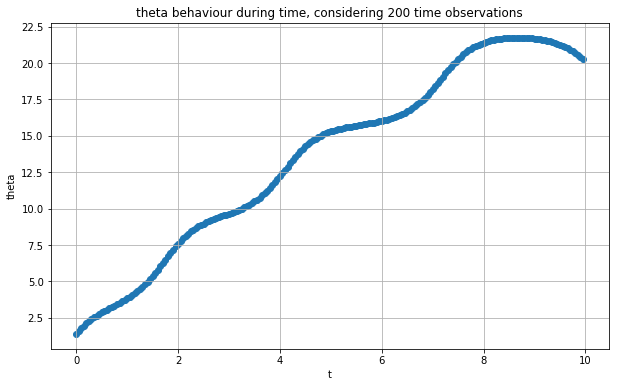

In [13]:
res.plot_t_vs_theta()

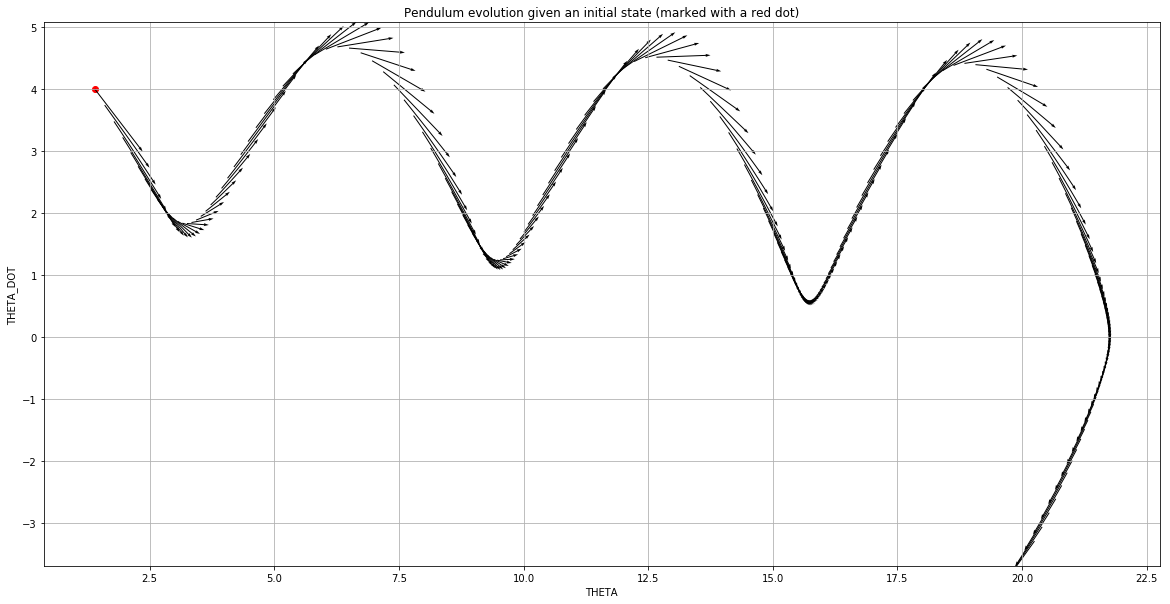

In [14]:
res.plot_thetadot_vs_theta()

In [15]:
# ok, now let's change initial values

# let's use really high initial velocity
t = 10
theta_0 = np.pi * 80 / 180 # 80 degrees
theta_dot_0 = 4            # velocity of 4
time_step = 0.01

res = theta_analysis(t, theta_0, theta_dot_0, time_step)

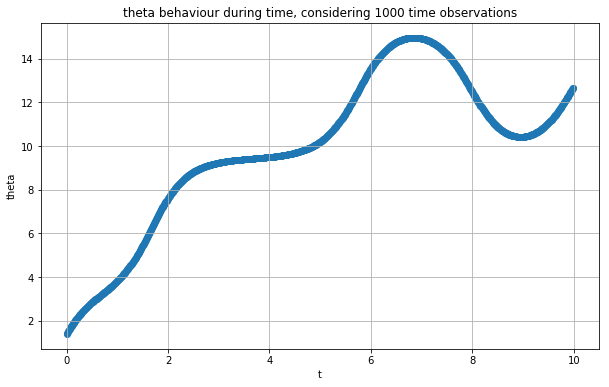

In [16]:
res.plot_t_vs_theta()

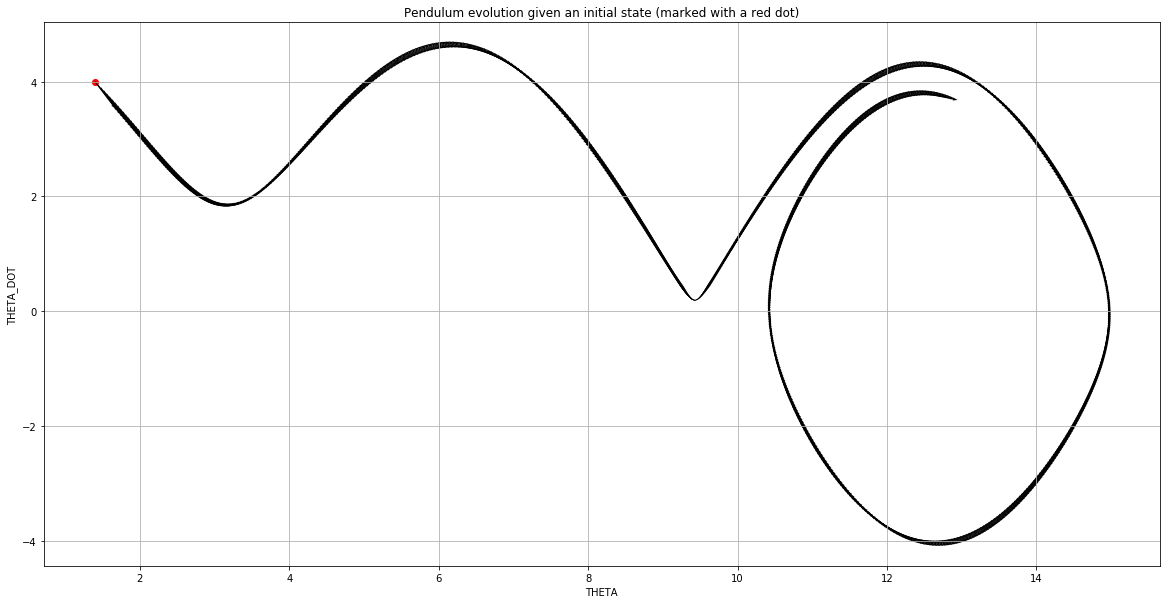

In [17]:
res.plot_thetadot_vs_theta()

## Note on time slots

time slots affects the accuracy and the precision of our computation. in this case with same conditions (and time = 10), using time slots = 0.01 gives better results than using 0.1

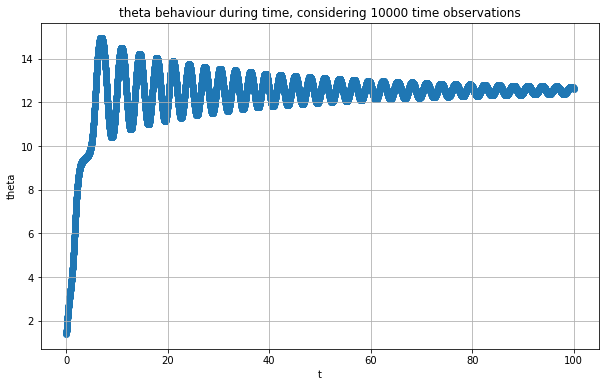

In [18]:
# ok, now let's change only the seconds

t = 100
time_step = 0.01

res = theta_analysis(t, theta_0, theta_dot_0, time_step)
res.plot_t_vs_theta()

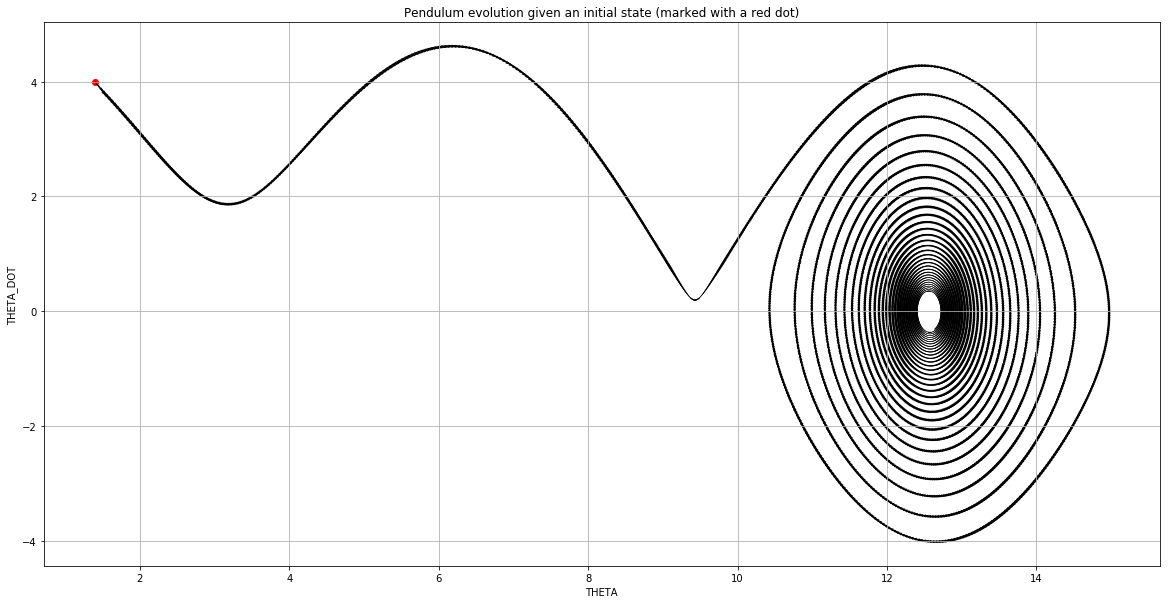

In [19]:
res.plot_thetadot_vs_theta()

In [20]:
# look at theta angle (radian)

res.df.theta.tail(1).values[0]

12.639891851318701

In [21]:
# which correspond to almost 2 complete circles

res.df.theta.tail(1).values[0] * 180 / np.pi / 360

2.011701268284339

In [22]:
res.df.head()

,t,theta,theta_dot,theta_double_dot
0,0.00,1.396263,4.000000,-5.225558
1,0.01,1.436263,3.947744,-5.225558
2,0.02,1.475741,3.895239,-5.250498
3,0.03,1.514693,3.842565,-5.267404
4,0.04,1.553119,3.789800,-5.276547
